In [ ]:
!pip install -U mne
from matplotlib import pyplot as plt
from scipy import signal
import numpy as np
import mne

BASE_DIR = "/content/drive/MyDrive/5275_Lab3_2/"

In [125]:
epochs = mne.io.read_epochs_eeglab(BASE_DIR + "Day 1_ERP.set")
#print(epochs.info, "\n")
#print(epochs.ch_names, "\n")
#print(epochs.__len__, "\n")
#print(epochs.get_data().shape)

Extracting parameters from /content/drive/MyDrive/5275_Lab3_2/Day 1_ERP.set...
Not setting metadata
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-125-a36a6452901c>:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.io.read_epochs_eeglab(BASE_DIR + "Day 1_ERP.set")
<ipython-input-125-a36a6452901c>:1: RuntimeWarning: Data file name in EEG.data (S1_mas_Raw.fdt) is incorrect, the file name must have changed on disk, using the correct file name (Day 1_ERP.fdt).
  epochs = mne.io.read_epochs_eeglab(BASE_DIR + "Day 1_ERP.set")


Problem11 (a): Guess the Range of Bandpass

In [128]:
# Range of Bandpass is shown in the info
""
print("High Pass: {}".format(epochs.info["highpass"])) # 0.0
print("Low Pass: {}".format(epochs.info["lowpass"])) # 125.0
##epochs.plot_psd()

High Pass: 0.0
Low Pass: 125.0


Problem11 (b): Guess the Portion of High Pitch and Low pitch

In [130]:
print("High Pitch : Low Pitch = {}:{}".format(epochs["2"].__len__(), epochs["3"].__len__()))

High Pitch : Low Pitch = 400:100


Problem11 (c): Plot the Fz, Cz, and Pz’s average ERP for Response respectively

Need more than one channel to make topography for eeg. Disabling interactivity.


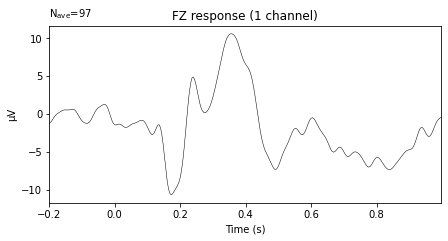

Need more than one channel to make topography for eeg. Disabling interactivity.


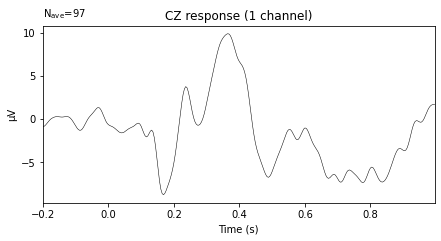

Need more than one channel to make topography for eeg. Disabling interactivity.


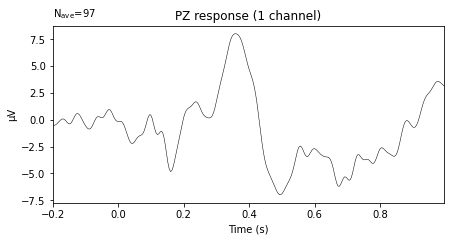

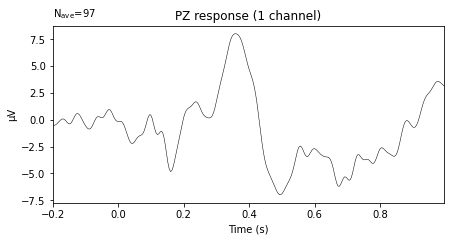

In [131]:
# Select the 'trigger 10' and get the evoked data
# Picked FZ, CZ, and PZ and plot the results

response = epochs["10"].average()# method=mean, median, std

response.plot(picks=["FZ"], spatial_colors=True, titles="FZ response")

response.plot(picks=["CZ"], spatial_colors=True, titles="CZ response")

response.plot(picks=["PZ"], spatial_colors=True, titles="PZ response")

Problem11 (d): Plot the Fz, Cz, and Pz’s average ERP for High pitch and Low pitch respectively

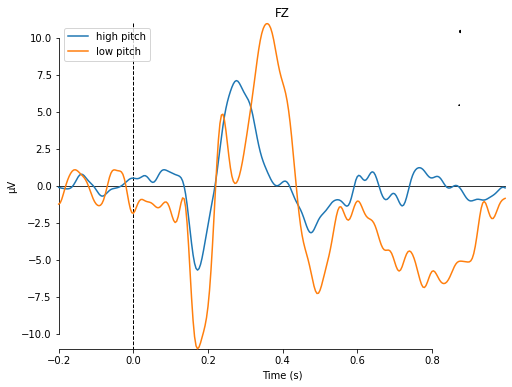

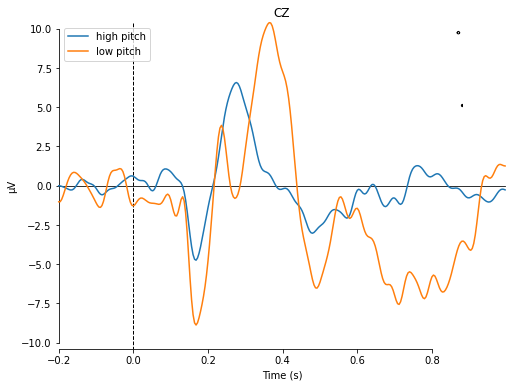

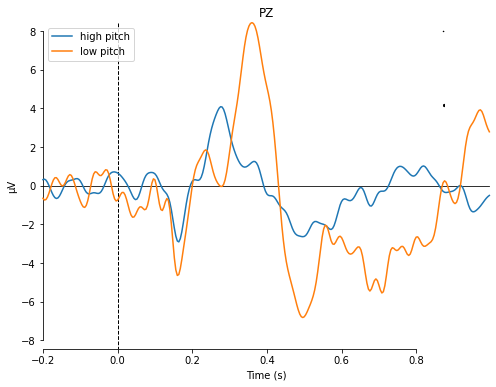

[<Figure size 576x432 with 2 Axes>]

In [132]:
# Picked FZ, CZ, and PZ and plot the results,
# and plot both High-pitch and Low-pitch

evokeds = {"high pitch": epochs["2"].average(), "low pitch": epochs["3"].average()}

mne.viz.plot_compare_evokeds(evokeds, picks=["FZ"])

mne.viz.plot_compare_evokeds(evokeds, picks=["CZ"])

mne.viz.plot_compare_evokeds(evokeds, picks=["PZ"])

Problem11 (e): Plot topoplot for High pitch and Low pitch respectively

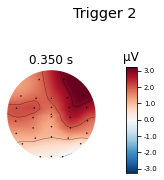

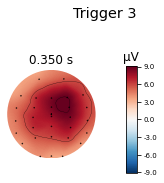

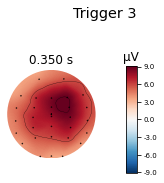

In [133]:
high_pitch = epochs["2"].average()
high_pitch.plot_topomap(times=[0.35], ch_type="eeg", average=0.1, title="Trigger 2")

low_pitch = epochs["3"].average()
low_pitch.plot_topomap(times=[0.35], ch_type="eeg", average=0.1, title="Trigger 3")

Problem11 (f): Plot topoplot for High pitch and Low pitch respectively with Min-Max normalization

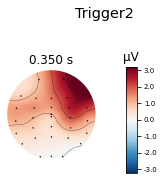

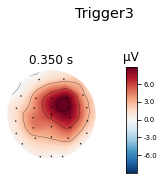

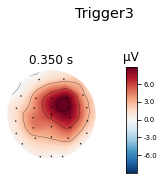

In [134]:
p300_epochs = epochs.copy().crop(0.3, 0.4)

# duplicate the evoked, for plotting the topomap
evoked_dup = p300_epochs.average().copy()


# Normalization for Trigger 2
mean2 = p300_epochs["2"].average().data

min2 = mean2.min(axis=0) 
max2 = mean2.max(axis=0)
nor2 = (mean2 - min2) / (max2 - min2)

evoked_dup.data = nor2 * mean2
evoked_dup.plot_topomap(times=[0.35], ch_type="eeg", average=0.1, title="Trigger2")

# Normalization for Trigger 3
mean3 = p300_epochs["3"].average().data

min3 = mean3.min(axis=0)
max3 = mean3.max(axis=0)
nor3 = (mean3 - min3) / (max3 - min3)

evoked_dup.data = nor3 * mean3
evoked_dup.plot_topomap(times=[0.35], ch_type="eeg", average=0.1, title="Trigger3")

Problem11 (g): For each channel, plot SNR for High picth and Low pitch.

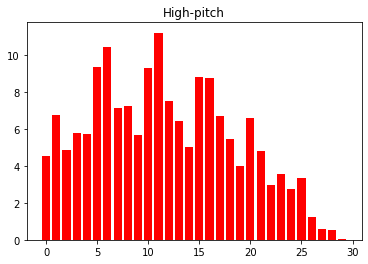

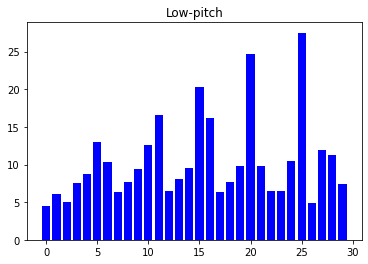

In [135]:
# target p300
p300_epochs = epochs.copy().crop(0.3, 0.4)


#-------------------------------------------------------#
# High-pitch # 

p300_high = p300_epochs["2"].average()

# get baseline, and calculate std
baseline_high = epochs.copy()["2"].crop(-0.2, 0)
noise_high = np.std(baseline_high.average().data, axis=1)

# calculate snr
snr_high = np.copy(p300_high.data)
for i in range(30):
    snr_high[i] = snr_high[i] / noise_high[i]
snr_high = np.mean(snr_high, axis=1)

# Plot the bar chart
plt.bar(range(30), snr_high, color='red')
plt.title('High-pitch')
plt.show()

#-------------------------------------------------------#
# Low-pitch # 

p300_low = p300_epochs["3"].average()

# get baseline, and calculate std
baseline_low = epochs.copy()["3"].crop(-0.2, 0)
noise_low = np.std(baseline_low.average().data, axis=1)

# calculate snr
snr_low = np.copy(p300_low.data)
for i in range(30):
    snr_low[i] = snr_low[i] / noise_low[i]
snr_low = np.mean(snr_low, axis=1)
# Plot the bar chart
plt.bar(range(30), snr_low, color='blue')
plt.title('Low-pitch')
plt.show()

Problem11 (h): Plot cumulative (by trial) SNR for Fz, Cz, and Pz channel

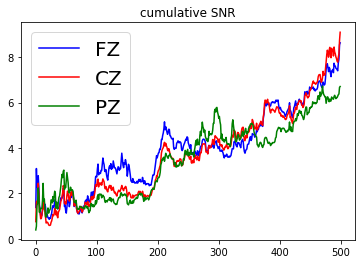

In [136]:
# target p300
p300_epochs = epochs.copy().crop(0.3, 0.4)

# iterate trials cumulatively 
cu_arr = []
for k in range(500):
    p300_evk = p300_epochs[:k+1].average().data
    baseline = epochs.copy()[:k+1].crop(-0.2, 0)
    noise = np.std(baseline.average().data, axis=1)
    snr = np.copy(p300_evk)

    cu_arr.append([np.mean(snr[4] / noise[4]), np.mean(snr[14] / noise[14]), np.mean(snr[24] / noise[24])])

#print(np.array(cu_arr).shape)
a = np.transpose(np.array(cu_arr))
#print(a.shape)
plt.plot(a[0], color='blue', label="FZ")
plt.plot(a[1], color='red', label="CZ")
plt.plot(a[2], color='green', label="PZ")
plt.legend(loc = "best", fontsize=20)
plt.title('cumulative SNR')
plt.show()

Problem12

In [139]:
#load eeg data 
raw= mne.io.read_epochs_eeglab(BASE_DIR + 'Day 2_SSVEP.set')
print(raw.event_id)

Extracting parameters from /content/drive/MyDrive/5275_Lab3_2/Day 2_SSVEP.set...
Not setting metadata
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Ready.
{'21': 1, '11': 2, '51': 3, '41': 4, '31': 5}


<ipython-input-139-6756556e4b93>:2: RuntimeWarning: Data file name in EEG.data (S1_Raw.fdt) is incorrect, the file name must have changed on disk, using the correct file name (Day 2_SSVEP.fdt).
  raw= mne.io.read_epochs_eeglab(BASE_DIR + 'Day 2_SSVEP.set')


Problem12 (a)

In [141]:
#signal set reference
mne.set_eeg_reference(raw, 'average')

#plot average signal
tmp= raw.copy()
#select 'FZ'
tmp.pick_channels(['FZ'])

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


Number of events,100
Events,11: 2021: 2031: 2041: 2051: 20
Time range,0.000 – 3.996 sec
Baseline,off


Need more than one channel to make topography for eeg. Disabling interactivity.


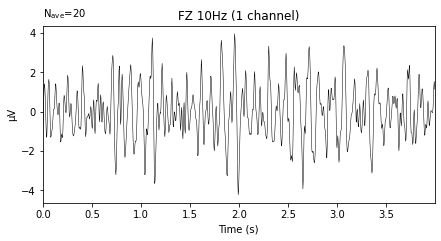

Need more than one channel to make topography for eeg. Disabling interactivity.


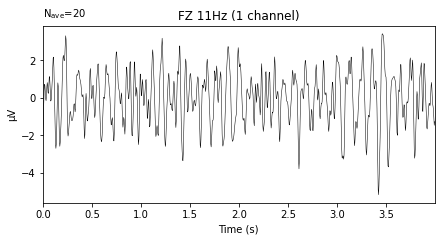

Need more than one channel to make topography for eeg. Disabling interactivity.


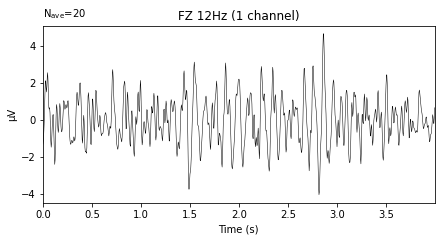

Need more than one channel to make topography for eeg. Disabling interactivity.


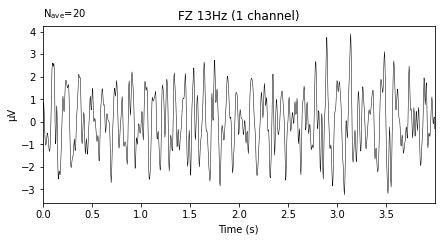

Need more than one channel to make topography for eeg. Disabling interactivity.


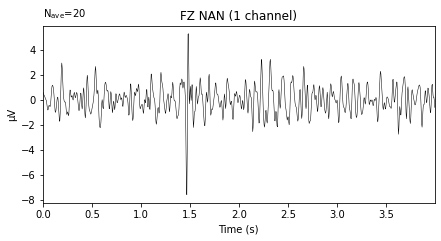

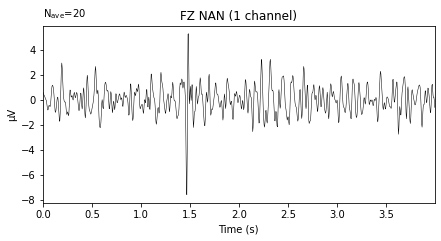

In [142]:
#plot average signal
tmp= raw.copy()
#select 'FZ'
tmp.pick_channels(['FZ'])

#signal 平均加畫圖
tmp['11'].average().plot(titles='FZ 10Hz')
tmp['21'].average().plot(titles='FZ 11Hz')
tmp['31'].average().plot(titles='FZ 12Hz')
tmp['41'].average().plot(titles='FZ 13Hz')
tmp['51'].average().plot(titles='FZ NAN')

Need more than one channel to make topography for eeg. Disabling interactivity.


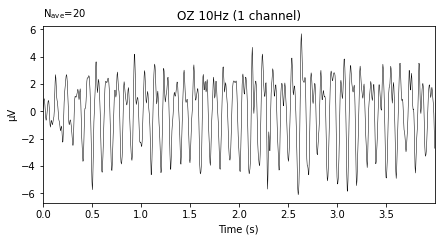

Need more than one channel to make topography for eeg. Disabling interactivity.


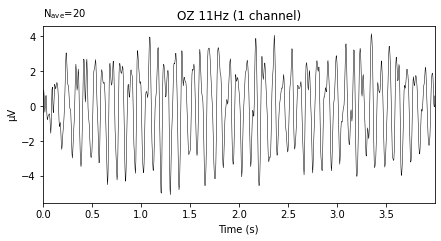

Need more than one channel to make topography for eeg. Disabling interactivity.


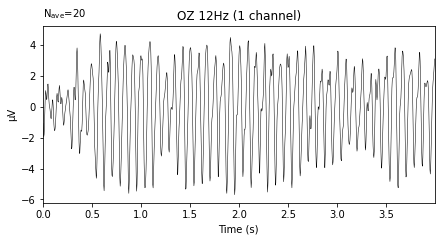

Need more than one channel to make topography for eeg. Disabling interactivity.


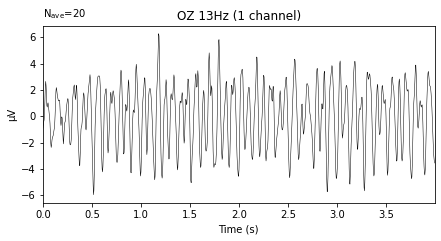

Need more than one channel to make topography for eeg. Disabling interactivity.


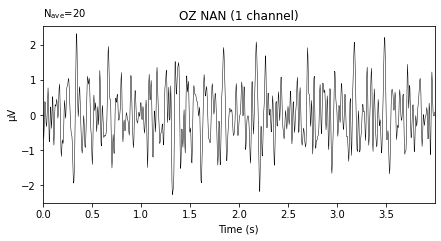

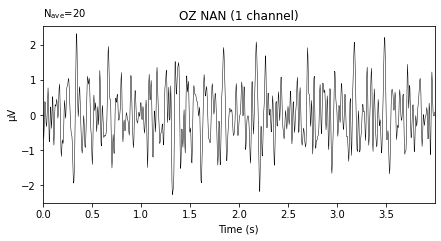

In [143]:
#plot average signal
tmp= raw.copy()
#select 'Oz'
tmp.pick_channels(['OZ'])

#signal 平均加畫圖
tmp['11'].average().plot(titles='OZ 10Hz')
tmp['21'].average().plot(titles='OZ 11Hz')
tmp['31'].average().plot(titles='OZ 12Hz')
tmp['41'].average().plot(titles='OZ 13Hz')
tmp['51'].average().plot(titles='OZ NAN')

Problem12 (b)

(1, 1000)
HZ_10_OZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


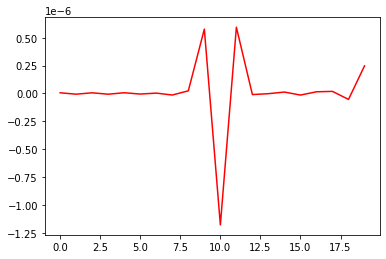

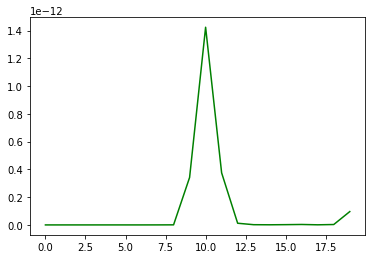

HZ_11_OZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


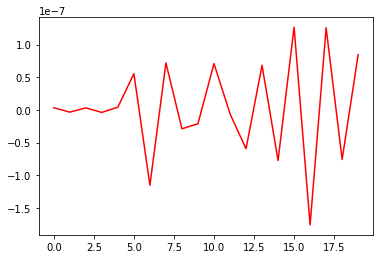

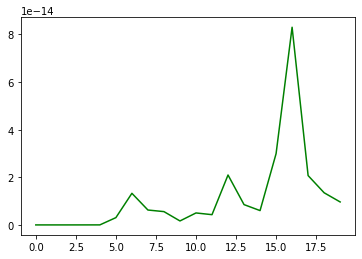

HZ_12_OZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


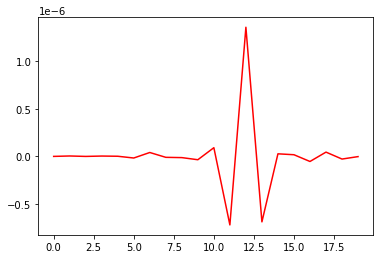

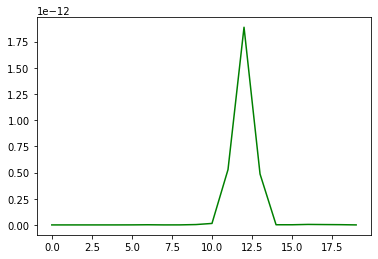

HZ_13_OZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


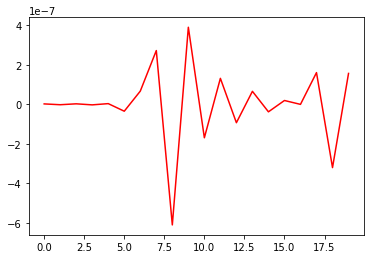

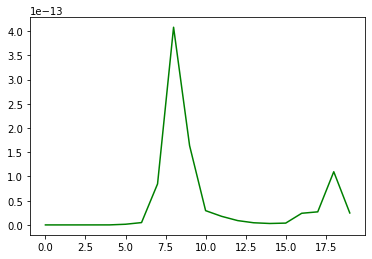

HZ_NAN_OZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


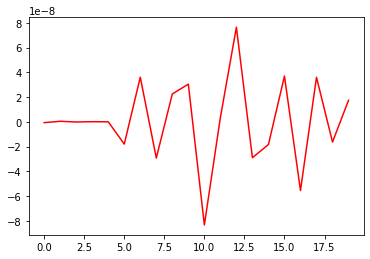

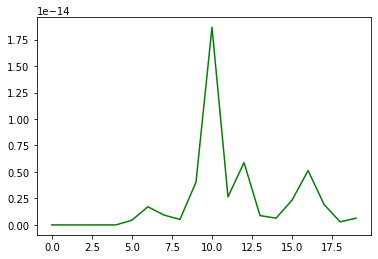

In [144]:

#抽取Oz不同刺激底下做平均
tmp= raw.copy()
HZ_10_Oz = tmp['11'].pick_channels(['OZ']).average()._data
HZ_11_Oz = tmp['21'].pick_channels(['OZ']).average()._data
HZ_12_Oz = tmp['31'].pick_channels(['OZ']).average()._data
HZ_13_Oz = tmp['41'].pick_channels(['OZ']).average()._data
HZ_NAN_Oz = tmp['51'].pick_channels(['OZ']).average()._data
print(HZ_10_Oz.shape)


#抽取Oz 10hz刺激下的signal做power frequecy plot
print("HZ_10_OZ")
f, t, Zxx = signal.stft(HZ_10_Oz,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

#抽取Oz 11hz刺激下的signal做power frequecy plot
print("HZ_11_OZ")
f, t, Zxx = signal.stft(HZ_11_Oz,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

#抽取Oz 12hz刺激下的signal做power frequecy plot
print("HZ_12_OZ")
f, t, Zxx = signal.stft(HZ_12_Oz,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

#抽取Oz 13hz刺激下的signal做power frequecy plot
print("HZ_13_OZ")
f, t, Zxx = signal.stft(HZ_13_Oz,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

#抽取Oz NAN刺激下的signal做power frequecy plot
print("HZ_NAN_OZ")
f, t, Zxx = signal.stft(HZ_NAN_Oz,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

HZ_10_FZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


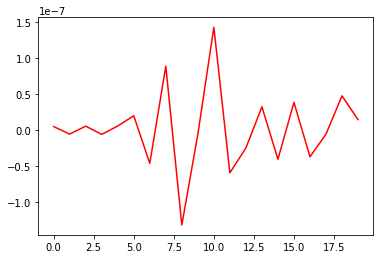

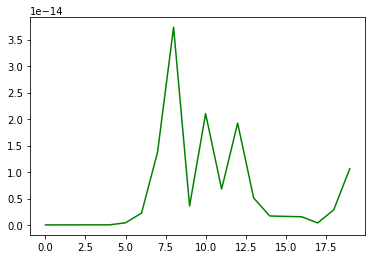

HZ_11_FZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


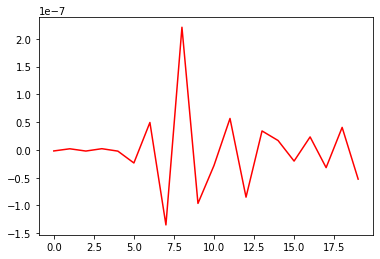

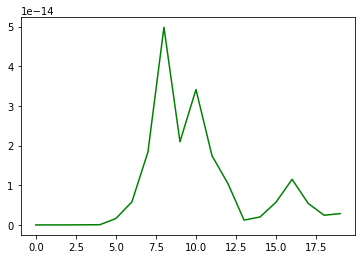

HZ_12_FZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


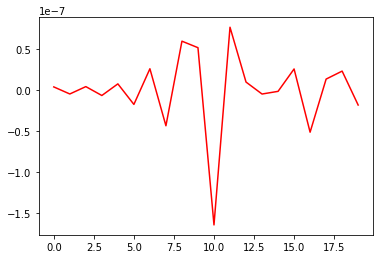

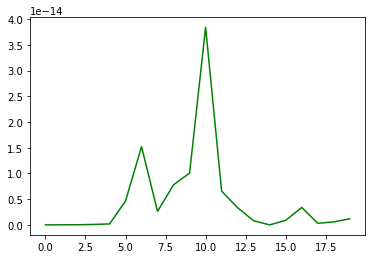

HZ_13_FZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


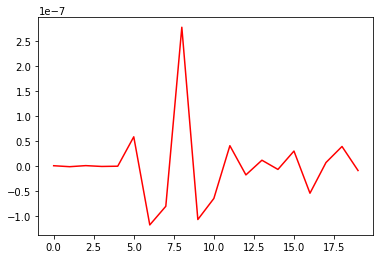

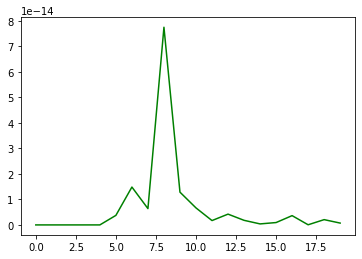

HZ_NAN_FZ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


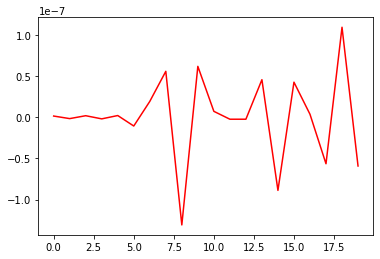

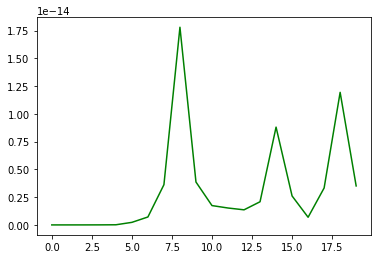

In [145]:
#抽取Oz不同刺激底下做平均
tmp= raw.copy()
HZ_10_FZ = tmp['11'].pick_channels(['FZ']).average()._data
HZ_11_FZ = tmp['21'].pick_channels(['FZ']).average()._data
HZ_12_FZ = tmp['31'].pick_channels(['FZ']).average()._data
HZ_13_FZ = tmp['41'].pick_channels(['FZ']).average()._data
HZ_NAN_FZ = tmp['51'].pick_channels(['FZ']).average()._data


#抽取Fz 10刺激下的signal做power frequecy plot
print("HZ_10_FZ")
f, t, Zxx = signal.stft(HZ_10_FZ,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

#抽取Fz 11刺激下的signal做power frequecy plot
print("HZ_11_FZ")
f, t, Zxx = signal.stft(HZ_11_FZ,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

#抽取Fz 12刺激下的signal做power frequecy plot
print("HZ_12_FZ")
f, t, Zxx = signal.stft(HZ_12_FZ,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

#抽取Fz 13刺激下的signal做power frequecy plot
print("HZ_13_FZ")
f, t, Zxx = signal.stft(HZ_13_FZ,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()


#抽取Fz NAN刺激下的signal做power frequecy plot
print("HZ_NAN_FZ")
f, t, Zxx = signal.stft(HZ_NAN_FZ,fs=250, window= 'hann',nperseg=250, noverlap= 250/2)
Zxx = np.mean(Zxx, axis=2)[0,:]
plt.plot(np.arange(126)[:20],Zxx[:20],color = 'r', label="TSMC")
plt.show()
plt.plot(np.arange(126)[:20],abs(Zxx[:20])**2,color = 'g', label="TSMC")
plt.show()

Problem12 (c)

In [146]:
raw.event_id = {'10Hz': 2, '11Hz': 1, '12Hz': 5, '13Hz': 4, 'Nan': 3}
k=0
# 設定位置
location= raw.get_montage().get_positions()['ch_pos']
position= np.zeros((len(location),3))

# new一個新的位置
for i in raw.ch_names:
    position[k,:]= location[i]
    k+=1
# 看position資料
print(position)

[[-2.94367e+01  8.39171e+01 -6.99000e+00]
 [ 2.98723e+01  8.48959e+01 -7.08000e+00]
 [-7.02629e+01  4.24743e+01 -1.14200e+01]
 [-5.02438e+01  5.31112e+01  4.21920e+01]
 [ 3.12200e-01  5.85120e+01  6.64620e+01]
 [ 5.18362e+01  5.43048e+01  4.08140e+01]
 [ 7.30431e+01  4.44217e+01 -1.20000e+01]
 [-8.07750e+01  1.41203e+01 -1.11350e+01]
 [-6.01819e+01  2.27162e+01  5.55440e+01]
 [ 3.76100e-01  2.73900e+01  8.86680e+01]
 [ 6.22931e+01  2.37228e+01  5.56300e+01]
 [ 8.18151e+01  1.54167e+01 -1.13300e+01]
 [-8.41611e+01 -1.60187e+01 -9.34600e+00]
 [-6.53581e+01 -1.16317e+01  6.43580e+01]
 [ 4.00900e-01 -9.16700e+00  1.00244e+02]
 [ 6.71179e+01 -1.09003e+01  6.35800e+01]
 [ 8.50799e+01 -1.50203e+01 -9.49000e+00]
 [-8.48302e+01 -4.60217e+01 -7.05600e+00]
 [-6.35562e+01 -4.70088e+01  6.56240e+01]
 [ 3.85800e-01 -4.73180e+01  9.94320e+01]
 [ 6.66118e+01 -4.66372e+01  6.55800e+01]
 [ 8.55488e+01 -4.55453e+01 -7.13000e+00]
 [-7.24343e+01 -7.34527e+01 -2.48700e+00]
 [-5.30073e+01 -7.87878e+01  5.594

x 為stimulus
y 為response


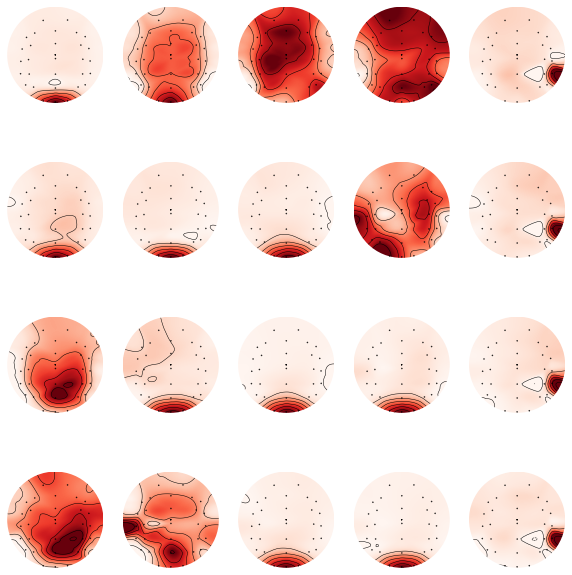

In [147]:
index=0
# 先預設好subplot
fig, big_axes = plt.subplots( 4, 5, figsize=(10, 10))

# new 一個array(channel,response,stimulus)
data = np.zeros([30,4,5])
# for(stimulus)迴圈去計算
for i in raw.event_id:
    sti_hz= raw[i].average()
    sti_hz= sti_hz._data
    f, Pxx = signal.welch(sti_hz,fs=250, nfft=250, window= 'hann',nperseg=250, noverlap= 250/2)
    data[:,:,index]= Pxx[:,10:14]
    index+=1

rep= (data-min(data.reshape(-1)))/(max(data.reshape(-1))-min(data.reshape(-1)))    
 
for i in range(4):
    for j in range(5):
        mne.viz.plot_topomap(data=rep[:,i,j], pos=position[:,0:2], axes=big_axes[i,j], show=False)

print("x 為stimulus")
print("y 為response")